In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setinin yolu
data_dir = '/content/drive/MyDrive/flower/cicekler'

# Veri setini train, test ve validation olarak ayırma oranları
train_split = 0.7
val_split = 0.15
test_split = 0.15

datagen = ImageDataGenerator(rescale=1./255, validation_split=val_split)

# Train veri seti ayrıma
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation veri seti ayırma
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test veri seti ayırma
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2550 images belonging to 6 classes.
Found 449 images belonging to 6 classes.
Found 449 images belonging to 6 classes.


Epoch 1/10
80/80 [==============================] - 71s 589ms/step - loss: 0.3087 - accuracy: 0.9106 - val_loss: 2.5930 - val_accuracy: 0.5612
Epoch 2/10
80/80 [==============================] - 43s 535ms/step - loss: 0.1784 - accuracy: 0.9482 - val_loss: 0.8001 - val_accuracy: 0.8686
Epoch 3/10
80/80 [==============================] - 43s 532ms/step - loss: 0.1221 - accuracy: 0.9647 - val_loss: 0.5940 - val_accuracy: 0.8486
Epoch 4/10
80/80 [==============================] - 42s 527ms/step - loss: 0.1144 - accuracy: 0.9686 - val_loss: 0.7296 - val_accuracy: 0.8486
Epoch 5/10
80/80 [==============================] - 43s 531ms/step - loss: 0.1046 - accuracy: 0.9702 - val_loss: 1.2117 - val_accuracy: 0.8552
Epoch 6/10
80/80 [==============================] - 42s 528ms/step - loss: 0.0444 - accuracy: 0.9894 - val_loss: 0.6460 - val_accuracy: 0.8686
Epoch 7/10
80/80 [==============================] - 43s 541ms/step - loss: 0.0814 - accuracy: 0.9761 - val_loss: 0.1846 - val_accuracy: 0.9443

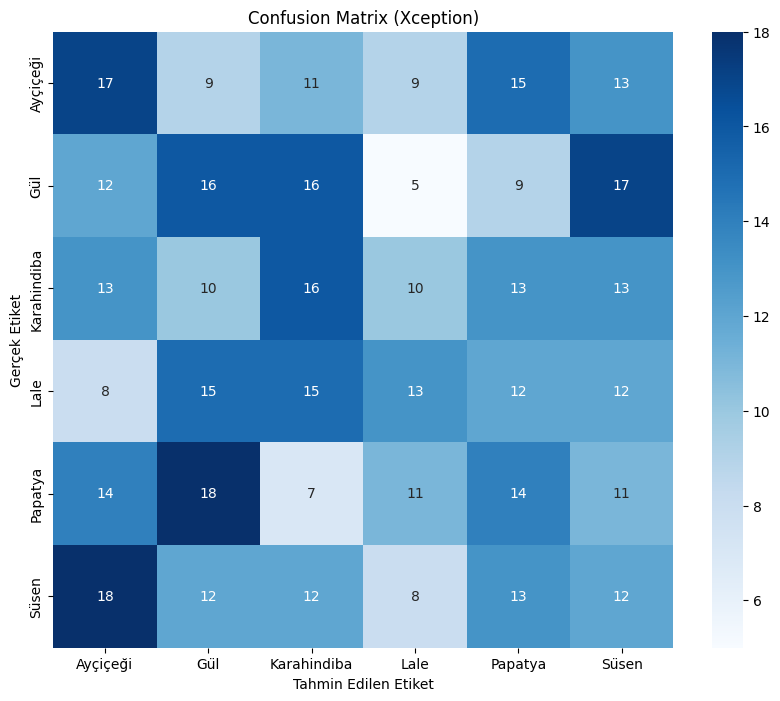

In [ ]:
model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Çıkış katmanı düzenleme (problemimize uygun olması için sınıf sayısında çıkış)
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(model.input, output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy (Xception):", test_accuracy)

# Predict aşaması
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# precision, recall ve f1 score değerlerini hesaplama ve yazdırma
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Genel Precision:", precision)
print("Genel Recall:", recall)
print("Genel F1 Score:", f1)

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix (Xception)')
plt.show()

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/10
80/80 [==============================] - 72s 401ms/step - loss: 0.5322 - accuracy: 0.8314 - val_loss: 3.3893 - val_accuracy: 0.3742
Epoch 2/10
80/80 [==============================] - 22s 275ms/step - loss: 0.2960 - accuracy: 0.9129 - val_loss: 1.3965 - val_accuracy: 0.7038
Epoch 3/10
80/80 [==============================] - 22s 272ms/step - loss: 0.1737 - accuracy: 0.9490 - val_loss: 2.1883 - val_accuracy: 0.7283
Epoch 4/10
80/80 [==============================] - 22s 275ms/step - loss: 0.1732 - accuracy: 0.9439 - val_loss: 0.5693 - val_accuracy: 0.8330
Epoch 5/10
80/80 [==============================] - 22s 276ms/step - loss: 0.1201 - accuracy: 0.9671 - val_loss: 0.4622 - val_accuracy: 0.8731
Epoch 6/10
80/80 [==============================] - 22s 276ms/step - loss: 0.1445 - accuracy: 0.9604 - val_loss: 2.8556 - val_accuracy: 0.5345
Epoch 7/10
80/80 [==============================] - 23s 284ms/step - loss: 0.

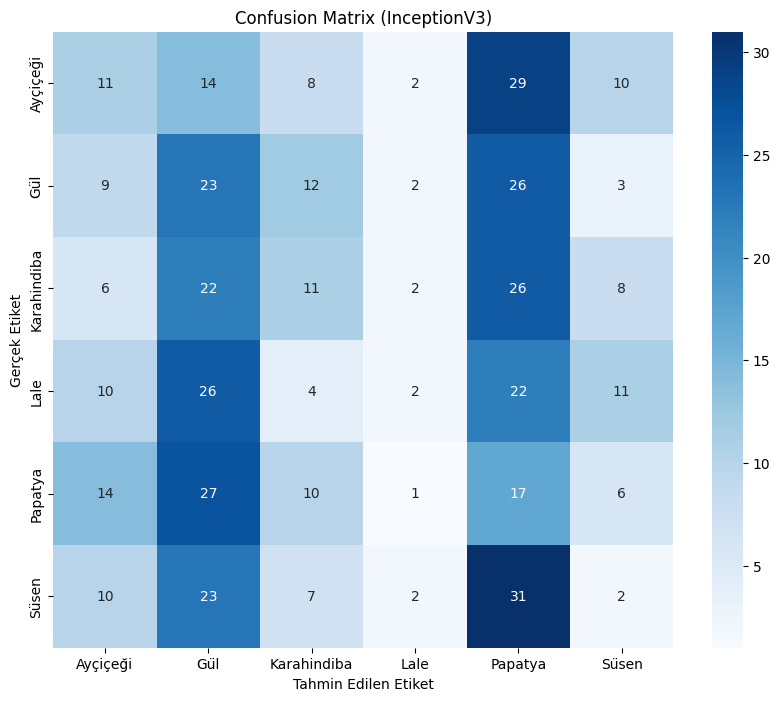

In [ ]:
model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Çıkış katmanı düzenleme (problemimize uygun olması için sınıf sayısında çıkış)
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(model.input, output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy (InceptionV3):", test_accuracy)

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Genel Precision:", precision)
print("Genel Recall:", recall)
print("Genel F1 Score:", f1)

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix (InceptionV3)')
plt.show()

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
80/80 [==============================] - 732s 9s/step - loss: 0.7310 - accuracy: 0.7757 - val_loss: 0.8535 - val_accuracy: 0.6993
Epoch 2/10
80/80 [==============================] - 412s 5s/step - loss: 0.2290 - accuracy: 0.9569 - val_loss: 0.6074 - val_accuracy: 0.7862
Epoch 3/10
80/80 [==============================] - 410s 5s/step - loss: 0.1455 - accuracy: 0.9706 - val_loss: 0.4644 - val_accuracy: 0.8285
Epoch 4/10
80/80 [==============================] - 403s 5s/step - loss: 0.1055 - accuracy: 0.9792 - val_loss: 0.3667 - val_accuracy: 0.8641
Epoch 5/10
80/80 [==============================] - 407s 5s/step - loss: 0.0818 - accuracy: 0.9851 - val_loss: 0.3167 - val_accuracy: 0.8820
Epoch 6/10
80/80 [==============================] - 413s 5s/step - loss: 0.0596 - accuracy: 0.9925 - val_loss: 0.2754 - val_accuracy: 0.9065
Epoch 7/10
80/80 [==============================] - 408s 5s/step - loss: 0.0493 - accuracy:

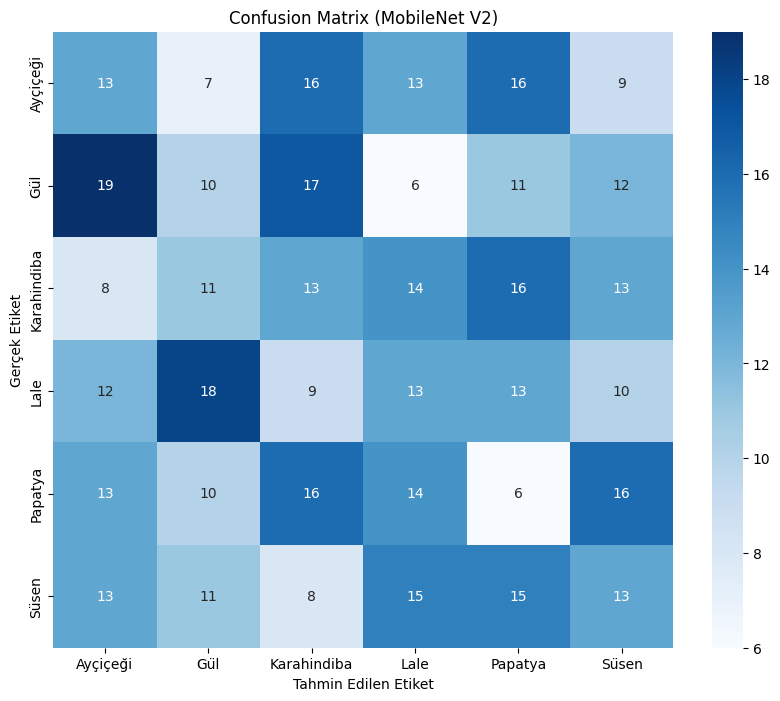

In [2]:
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Çıkış katmanı düzenleme (problemimize uygun olması için sınıf sayısında çıkış)
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(model.input, output)
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy (MobileNet V2):", test_accuracy)

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Genel Precision:", precision)
print("Genel Recall:", recall)
print("Genel F1 Score:", f1)

conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix (MobileNet V2)')
plt.show()